# Prosper Loans
#### _by Tyler Sanders_ 

## Introduction
> In this notebook, I will explore the Prosper Loan dataset that can be downloaded by clicking <a href='https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.'> here</a>.  Prosper was the first peer-to-peer lender in the United States and since 2005, Prosper has facilitated more than $18 billion in loans to more than 1,080,000 people. The Prosper Loan dataset details 113937 loans lent by Prosper from 2005 to 2014. 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.shape

(113937, 81)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

>The Prosper Loan dataset details 113937 loans lent by Prosper from 2005 to 2014. There are 81 different variables of each loan  For greater detail into each variable, use the <a href='https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0'>Prosper Loan Data - Variable Definitions</a> as a source of reference. 
### What is/are the main feature(s) of interest in your dataset?

> In this notebook I will compare loans that get completed in Good Standing with loans that are in Bad Standing, going into Default and eventually being Charged off as an uncollectible debt. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The variables most fundamental to this analysis are Loan Status, Loan Original Amount, the Borrowers Annual Percentage Rate, the Credit Score of the lendee, Estimated Return of the loans.

In [7]:
clean_loans = loans.copy()

In [8]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount','BorrowerAPR',
             'CreditScoreRangeLower','EstimatedReturn']]

In [9]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,BorrowerAPR,CreditScoreRangeLower,EstimatedReturn
1,Current,10000,0.12016,680.0,0.05470
3,Current,10000,0.12528,800.0,0.06000
4,Current,15000,0.24614,680.0,0.09066
5,Current,15000,0.15425,740.0,0.07077
6,Current,3000,0.31032,680.0,0.11070


In [10]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 5 columns):
LoanStatus               84853 non-null object
LoanOriginalAmount       84853 non-null int64
BorrowerAPR              84853 non-null float64
CreditScoreRangeLower    84853 non-null float64
EstimatedReturn          84853 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ MB


## Univariate Exploration

In [11]:
clean_loans.LoanOriginalAmount.min(),clean_loans.LoanOriginalAmount.max()

(1000, 35000)

In [12]:
clean_loans.LoanOriginalAmount.value_counts().sort_index()

1000     761
1050       7
1080       1
1099       1
1100      41
        ... 
34000      5
34679      1
34700      1
34999      3
35000    430
Name: LoanOriginalAmount, Length: 1934, dtype: int64

In [13]:
clean_loans.BorrowerAPR.min(),clean_loans.BorrowerAPR.max()

(0.04583, 0.42395)

In [14]:
clean_loans.BorrowerAPR.value_counts().sort_index() 

0.04583     1
0.04935     2
0.05335     1
0.05425     1
0.05436     1
           ..
0.40429     1
0.40679    11
0.40745     3
0.41355    44
0.42395     1
Name: BorrowerAPR, Length: 2330, dtype: int64

In [15]:
clean_loans.CreditScoreRangeLower.min(),clean_loans.CreditScoreRangeLower.max()

(600.0, 880.0)

In [16]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

600.0     1040
620.0     1653
640.0     8849
660.0    14133
680.0    14019
700.0    13610
720.0    11034
740.0     7871
760.0     5253
780.0     3705
800.0     2107
820.0     1042
840.0      398
860.0      122
880.0       17
Name: CreditScoreRangeLower, dtype: int64

In [17]:
title = 15
ht = 0.5
sb = 'steelblue'
ma = 'mediumaquamarine'

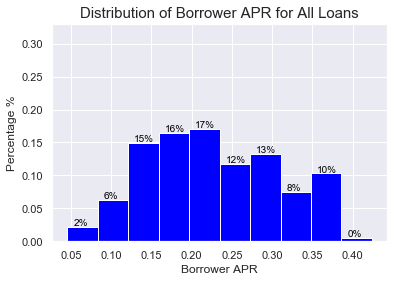

In [18]:
weights_df=np.ones(len(clean_loans)) / len(clean_loans)

counts, bins, bars = plt.hist(clean_loans['BorrowerAPR'], weights=weights_df, bins=10,color='blue')
plt.ylim(0,.22)
for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.0075,counts[i]+.002, s=f"{val:.0f}%",color='black')
plt.ylim(0,.33)
plt.xlabel('Borrower APR')
plt.ylabel('Percentage %')
plt.title('Distribution of Borrower APR for All Loans',size=title);

> 74% of all loans have a Borrower APR between 0.1 and 0.3 percent 
> 0.20 to 0.25 is the most concentratd, with 17%
> It is possible to have a near zero percent APR when a bank is financing loans for third-parties. The best expample of these situations is in the instance of Auto Loans, financed at extremely low rates to incentivize a purchase.

Text(0.5, 1.0, 'Distribution of Original Loan Amount for All Loans')

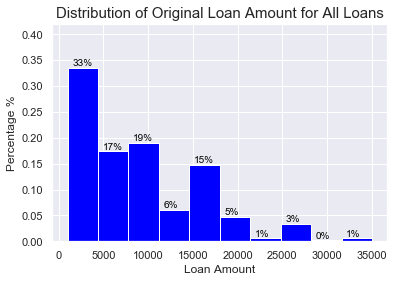

In [19]:
counts, bins, bars = plt.hist(clean_loans['LoanOriginalAmount'], weights=weights_df, bins=10,color='blue')

for i in range(len(counts)):
    val = counts[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+500,counts[i]+.004, s=f"{val:.0f}%",color='black')
plt.ylim(0,.42)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage %')
plt.title('Distribution of Original Loan Amount for All Loans',size=title)

> 90% of all loans in the dataset were less than 20,000 USD.
> 69% of the loans had an amount of less than 10,000 USD.
> For this dataset only 1 percent of the loans had an amount over 30,000 USD.

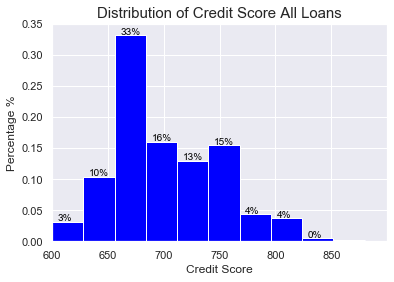

In [20]:
counts, bins, bars = plt.hist(clean_loans['CreditScoreRangeLower'], weights=weights_df, bins=10,color='blue')


for i in range(len(counts)):
    val = counts[i]*100
    if val < .4:
        pass
    else:
        plt.text(bins[i]+5,counts[i]+.001, s=f"{val:.0f}%",color='black')
plt.xlim(600,900)
plt.xlabel('Credit Score')
plt.ylabel('Percentage %')
plt.ylim(0,.35)
plt.yticks(np.arange(0,.35+.01,step=.05))
plt.xticks(np.arange(600,900,step=50))
plt.title('Distribution of Credit Score All Loans',size=title);

> 59% of the loans had lendees who's Credit Score at the time were between 650 and 725. 
> Only 23% of the the lendees had a Credit Scores of 750 or above.

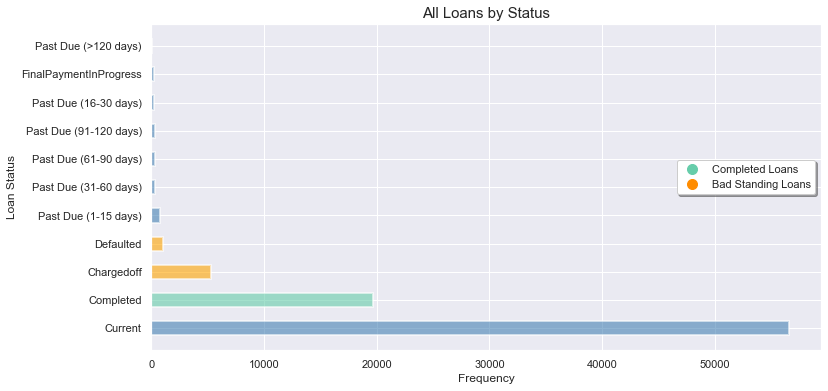

In [21]:
title = 15
keys = clean_loans['LoanStatus'].value_counts().keys()
values = clean_loans['LoanStatus'].value_counts().values
ht = 0.5
sb = 'steelblue'
ma = 'mediumaquamarine'

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, 
        color=[sb,ma,'orange','orange',sb,sb,sb,sb,sb,sb,sb,sb])
plt.title('All Loans by Status', size=title)

colors = ["mediumaquamarine", "darkorange"]
texts = ["Completed Loans", "Bad Standing Loans"]

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(1, .6),shadow=True);
plt.xlabel('Frequency')
plt.ylabel('Loan Status')
plt.show()

> The Loan Status is categories by _Current_ , _Completed_ , _Chargedoff_ , _Defaulted_ ,_Past Due_ by time period, and _Final Payment In Progress_ . 
> For the purposes of my analysis, I will key in on the 3 loan statuses of _Defaulted, Chargedoff_ , and _Completed_. In my next steps, I will group _Defaulted_ loans with _Chargedoff_ loans, giving them the label of Bad Standing Loans. These are the loans that have gone that are more than 120 days past due on their payments and outstanding debts deemed uncollectible. I will compare the Bad Standing Loans with the loans that have been _Completed_ and distiguish the key features between them.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In evaluating Loan I found that the majority of the status are current, but not completed. Though a loan can be current, or past due presently, it can still ends in Complete or Bad Standing.  Because of this, I will exclude the _Current_ , _Final Payment in Progress_ , and _Past Due_ . For my comparison I want to get to the underlying patterns in the features that develop between a debt that is never repaid and a successfully repaid debt.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Through my exploration, no anomolies were detected. With the exception to the small changes I have made when evaluating _Loan Status_ , no additional transformation was needed. 

## Bivariate Exploration

> In this section, I will investigate the relationships between pairs of variables in my
data.

In [22]:
complete_loans = clean_loans.query("LoanStatus == 'Completed'")
badloans = clean_loans.query("LoanStatus == 'Defaulted'" or "LoanStatus == 'Chargedoff'" )

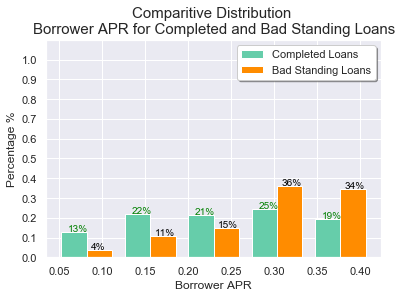

In [23]:
sns.set_style('darkgrid')


weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(complete_loans)) / len(complete_loans)

x = complete_loans['BorrowerAPR']
y = badloans['BorrowerAPR']


counts, bins, bars= plt.hist([x, y], label=['Completed Loans','Bad Standing Loans'],
                             bins=5 ,weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]


for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.015,counts_0[i]+.002, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+0.042,counts_1[i]+.002, s=f"{val:.0f}%",color='black')
        
               
        
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.xlabel('Borrower APR')
plt.ylabel('Percentage %')
plt.legend(loc='upper right',facecolor='white',shadow=True)
plt.title('Comparitive Distribution \nBorrower APR for Completed and Bad Standing Loans',size=title);

> Once categories by Completeed Loans and Bad Standing Loans, there are several take aways that can be determined from the comparative distribution of Borrower APR.  From Borrower APR of 0 to 0.20, more loans are Completed than those in that end in Default or Chargedoff.  As the Borrower APR increases the relationship is switched. 70% of all Bad Standing Loans occurred when the Borrower APR was 0.3 to 0.4.   Comparatively only 44% of the Completed loans occurred when the Borrower APR was 0.3 to 0.4. 
> Borrower APR looks to be a key contributor to the liklihood of a loan never being paid off and finishing in Bad Standing

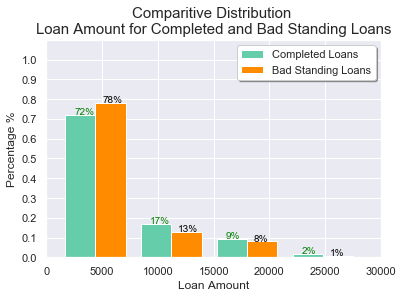

In [24]:
x = complete_loans['LoanOriginalAmount']
y = badloans['LoanOriginalAmount']

counts, bins, bars = plt.hist([x, y], label=['Completed Loans','Bad Standing Loans'], bins=5, weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])


counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+1500,counts_0[i]+.002, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+4000,counts_1[i]+.002, s=f"{val:.0f}%",color='black')   


plt.xlim(0,30000)
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.xlabel('Loan Amount')
plt.ylabel('Percentage %')
plt.legend(loc='upper right',facecolor='white',shadow=True)
plt.title('Comparitive Distribution \nLoan Amount for Completed and Bad Standing Loans',size=title);

> The Loan Amount is consistent across both categorical distribtions. The main take away from the comparison is that in both cases, the dataset skews heavily favor smaller loans less than 15,000 USD to the larger loans.  For Bad Standing Loans, 91% of loans are under 15,000 USD. Similarly 89% of all Completed Loans were under 15,000 USD.

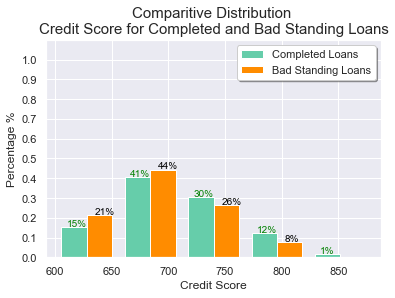

In [25]:
x = complete_loans['CreditScoreRangeLower']
y = badloans['CreditScoreRangeLower']
counts, bins, bars = plt.hist([x, y], label=['Completed Loans', 'Bad Standing Loans'], bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+10
                 ,counts_0[i]+.005, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < 0.1:
        pass
    else:
        plt.text(bins[i]+35,counts_1[i]+.005, s=f"{val:.0f}%",color='black') 

plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.xlabel('Credit Score')
plt.ylabel('Percentage %')
plt.legend(loc='upper right', facecolor='white',shadow=True)
plt.title('Comparitive Distribution \nCredit Score for Completed and Bad Standing Loans',size=title);

> An interesting takeaway from this comparative distribution is that the credit score of the individual had a slight relationship with the Bad Standing Loans.  Lendees receiving loans they were unable to to return had lower Credit Scores in comparison to the Completed Loans. 65% of Bad Standing Loans had a Credit Score lower than 750, compared to 56% of the Completed Loans

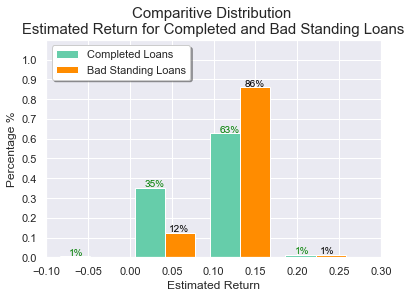

In [26]:
x = complete_loans['EstimatedReturn']
y = badloans['EstimatedReturn']
counts, bins, bars = plt.hist([x, y], label=['Completed Loans', 'Bad Standing Loans'], bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])

counts_0 = counts[0]
counts_1 = counts[1]

for i in range(len(counts_0)):
    val = counts_0[i]*100
    if val < 0.5:
        pass
    else:
        plt.text(bins[i]+0.02,counts_0[i]+.005, s=f"{val:.0f}%",color='green')
        
for i in range(len(counts_1)):
    val = counts_1[i]*100
    if val < .5:
        pass
    else:
        plt.text(bins[i]+0.05,counts_1[i]+.005, s=f"{val:.0f}%",color='black') 
plt.xlim(-.1,.3)
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.01,.1))
plt.xlabel('Estimated Return')
plt.ylabel('Percentage %')
plt.legend(loc='upper left', facecolor='white',shadow=True)
plt.title('Comparitive Distribution \nEstimated Return for Completed and Bad Standing Loans',size=title);

> Bad Standing Loans had a very small amount of loans whose estimated return fell from 0.0 to 0.05, with only 12%.  86% of the Bad Standing Loans had a return from 0.10 to .15.  Completely Loans only had 63% percent that fell in this same bin. From this it can be derived that for most Bad Standing Loans, the rate of return was higher, likely related to the higher borrowering APR, in which case the lender was more economically incentivized to loan at a higher rate of return, but this was also more likely for the the lendee to end without ever being able to repay their loan. 

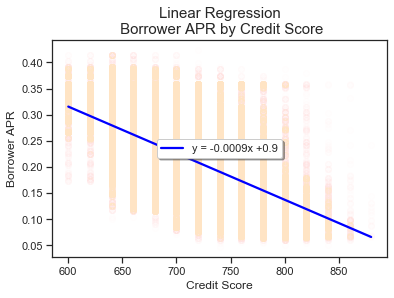

In [27]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['CreditScoreRangeLower'],clean_loans['BorrowerAPR'])
slope = round(slope,4)
intercept = round(intercept,1)

ax =sns.regplot(x=clean_loans['CreditScoreRangeLower'],y=clean_loans['BorrowerAPR'], scatter_kws={'color':'bisque','alpha':0.009},
           line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"},truncate=True)

ax.legend(loc=10,facecolor='white',shadow=True)
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR')
plt.title('Linear Regression\n Borrower APR by Credit Score',size=title);

''

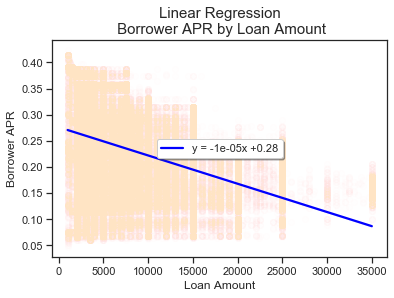

In [28]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['LoanOriginalAmount'],clean_loans['BorrowerAPR'])
slope = round(slope,5)
intercept = round(intercept,2)

ax = sns.regplot(x=clean_loans['LoanOriginalAmount'],y=clean_loans['BorrowerAPR'], scatter_kws={'color':'bisque','alpha':0.009},
            line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True)

plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')

plt.title('Linear Regression\n Borrower APR by Loan Amount',size=title)
ax.legend(loc=10,shadow=True)
;

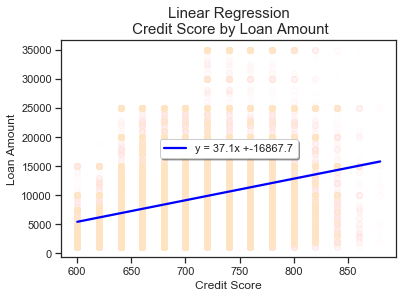

In [29]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['CreditScoreRangeLower'],clean_loans['LoanOriginalAmount'])
slope = round(slope,1)
intercept = round(intercept,1)

ax = sns.regplot(x=clean_loans['CreditScoreRangeLower'],y=clean_loans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);


plt.xlabel('Credit Score')
plt.ylabel('Loan Amount')
plt.title('Linear Regression\n Credit Score by Loan Amount', size=title)
ax.legend(loc=10,shadow=True)
plt.show()

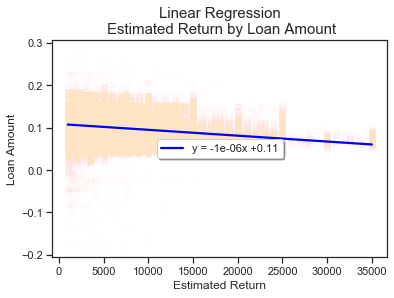

In [30]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['LoanOriginalAmount'],clean_loans['EstimatedReturn'])
slope = round(slope,6)
intercept = round(intercept,2)

ax = sns.regplot(x=clean_loans['LoanOriginalAmount'],y=clean_loans['EstimatedReturn'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);

plt.xlabel('Estimated Return')
plt.ylabel('Loan Amount')
plt.title('Linear Regression\n Estimated Return by Loan Amount',size=title)
ax.legend(loc=10,shadow=True)
plt.show()

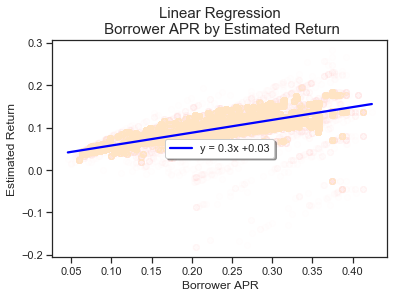

In [31]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['BorrowerAPR'],clean_loans['EstimatedReturn'])
slope = round(slope,1)
intercept = round(intercept,2)

ax = sns.regplot(x=clean_loans['BorrowerAPR'],y=clean_loans['EstimatedReturn'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);

plt.xlabel('Borrower APR')
plt.ylabel('Estimated Return')
plt.title('Linear Regression\n Borrower APR by Estimated Return',size=title)
ax.legend(loc=10,shadow=True)
plt.show()

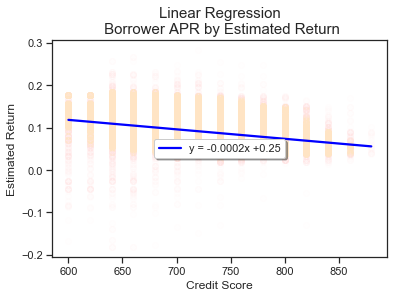

In [32]:
sns.set_style('ticks')
slope, intercept, r_value, p_value, std_err = stats.linregress(clean_loans['CreditScoreRangeLower'],clean_loans['EstimatedReturn'])
slope = round(slope,4)
intercept = round(intercept,2)

ax = sns.regplot(x=clean_loans['CreditScoreRangeLower'],y=clean_loans['EstimatedReturn'], scatter_kws={'color':'bisque','alpha':0.009},
          line_kws={'color':'blue', 'label': f"y = {slope}x +{intercept}"}, truncate=True);
plt.xlabel('Credit Score')
plt.ylabel('Estimated Return')
plt.title('Linear Regression\n Borrower APR by Estimated Return',size=title)
ax.legend(loc=10,shadow=True)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [33]:
loan_standing  = clean_loans.copy()

In [34]:
loan_standing.loc[(loan_standing['LoanStatus'] == 'Defaulted'),'LoanStatus']='Bad Standing'
loan_standing.loc[(loan_standing['LoanStatus'] == 'Chargedoff'),'LoanStatus']='Bad Standing'

In [35]:
loan_category = loan_standing.query("LoanStatus == 'Completed' or LoanStatus == 'Bad Standing'")
complete_reg = loan_standing.query("LoanStatus == 'Completed'")
default_reg = loan_standing.query("LoanStatus == 'Bad Standing'")
loan_category.LoanStatus.value_counts()

Completed       19664
Bad Standing     6341
Name: LoanStatus, dtype: int64

<Figure size 576x432 with 0 Axes>

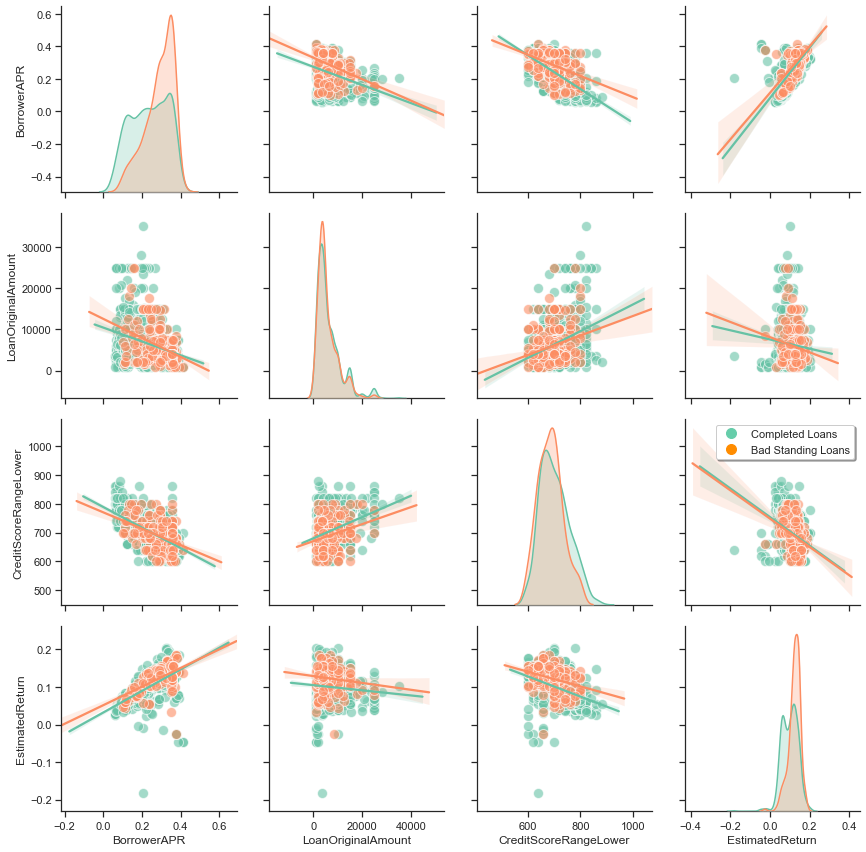

In [36]:
sns.set_style('ticks')
fig = plt.figure(figsize=(8,6))


ln = sns.pairplot(loan_category.sample(1000),vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower','EstimatedReturn'], kind='reg',
            plot_kws=dict(scatter_kws=dict(alpha =0.6, s = 100,edgecolor='white')), hue="LoanStatus", palette="Set2", height=3)
ln._legend.remove()
colors = ["mediumaquamarine", "darkorange"]
texts = ["Completed Loans", "Bad Standing Loans"]

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(1, 1),shadow=True);


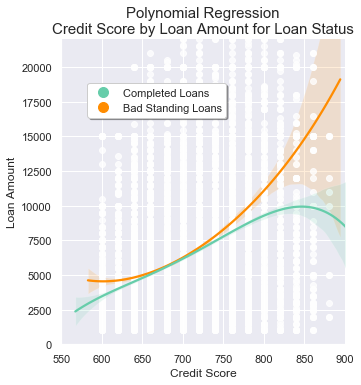

In [37]:
sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, order=4, legend=False)
plt.xlim(550,900)
plt.ylim(0,22000)

plt.xlabel('Credit Score')
plt.ylabel('Loan Amount')
plt.title('Polynomial Regression\nCredit Score by Loan Amount for Loan Status',size=title)

plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.6, .8),shadow=True);

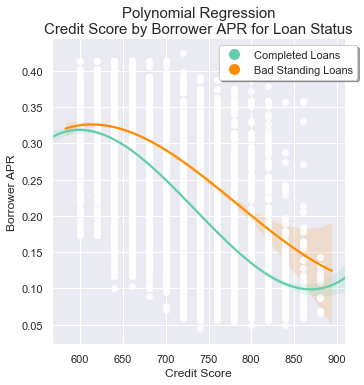

In [38]:
sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, legend=False, order=3)
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR')
plt.title('Polynomial Regression\nCredit Score by Borrower APR for Loan Status',size=title)
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.55, .85),shadow=True);

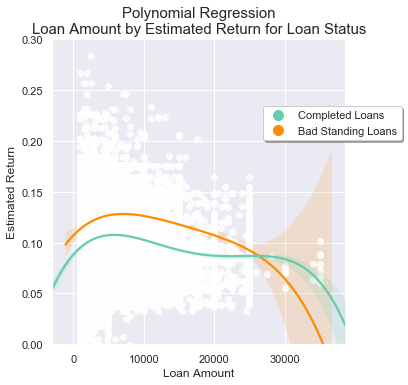

In [39]:
sns.set_style('darkgrid')
sns.lmplot(x = 'LoanOriginalAmount', y = 'EstimatedReturn', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, order=4, legend=False)
plt.ylim(0,.3)
plt.xlabel('Loan Amount')
plt.ylabel('Estimated Return')
plt.title('Polynomial Regression\nLoan Amount by Estimated Return for Loan Status',size=title)

plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.7, .8),shadow=True);

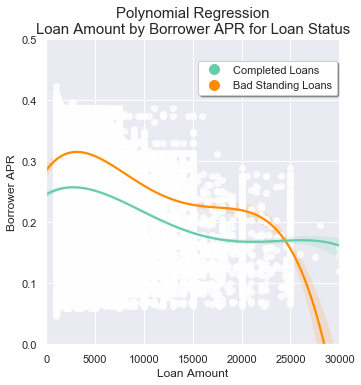

In [40]:
sns.set_style('darkgrid')
sns.lmplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={"color": 'white'},legend=False, order=4)
plt.title('Loan Amount vs Borrower APR',size= 15)
plt.ylim(0,.5)
plt.xlim(0,30000)
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.title('Polynomial Regression\nLoan Amount by Borrower APR for Loan Status',size=title)

plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.5, .8),shadow=True);

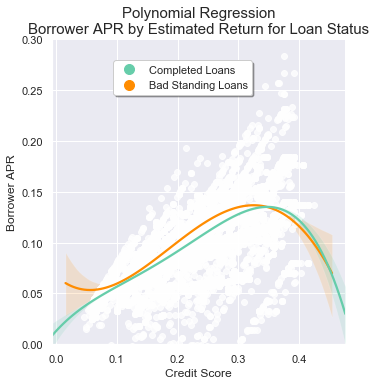

In [41]:
sns.set_style('darkgrid')
sns.lmplot(x = 'BorrowerAPR', y = 'EstimatedReturn', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, order=4, legend=False)
plt.ylim(0,.3)
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR')
plt.title('Polynomial Regression\nBorrower APR by Estimated Return for Loan Status',size=title)
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.7, .8),shadow=True);

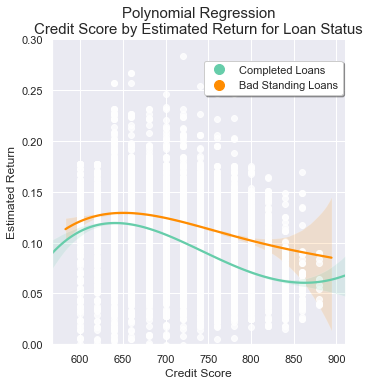

In [42]:
sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'EstimatedReturn', hue="LoanStatus", data=loan_category,palette=['darkorange','mediumaquamarine'],
          scatter_kws={'color':'white'}, order=4, legend=False)
plt.ylim(0,.3)
plt.xlabel('Credit Score')
plt.ylabel('Estimated Return')
plt.title('Polynomial Regression\nCredit Score by Estimated Return for Loan Status',size=title)
plt.legend(handles=patches, ncol=1, facecolor="white",bbox_to_anchor=(.5, .8),shadow=True);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

### References
- https://seaborn.pydata.org/generated/seaborn.lmplot.html
- https://stackoverflow.com/questions/14032521/python-data-structure-sort-list-alphabetically
- https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend
- https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
- https://matplotlib.org/stable/gallery/color/named_colors.html
- https://stackoverflow.com/questions/54781243/hide-legend-from-seaborn-pairplot
- https://stackoverflow.com/questions/49907455/hide-code-when-exporting-jupyter-notebook-to-html
- https://nbconvert.readthedocs.io/en/latest/usage.html